# DL CASE-STUDIES | COMPUTER VISION (CV)

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

In [3]:
import warnings
warnings.filterwarnings("ignore")

==========

## Traffic Signs | Image Classification (CV Case-study)

Dataset Source: https://www.kaggle.com/code/shivank856/gtsrb-cnn-98-test-accuracy/data

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


In [4]:
#from IPython.display import Image
#Image("imgs/lenet.png")

In [5]:
#from IPython.display import Image
#Image("imgs/traffic-signs-cnn.png")

## Importing & Inspecting Data

In [6]:
train = pd.read_pickle('train.p')
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [7]:
X_train, y_train = train['features'], train['labels']

In [8]:
valid = pd.read_pickle('valid.p')
# valid

In [9]:
X_valid, y_valid = valid['features'], valid['labels']

In [10]:
test = pd.read_pickle('test.p')
# test

In [11]:
X_test, y_test = test['features'], test['labels']

In [12]:
X_train.shape # 32 pixel * 32 pixel ,3 RGB

(34799, 32, 32, 3)

In [13]:
y_train.shape

(34799,)

## Exploring Data

9

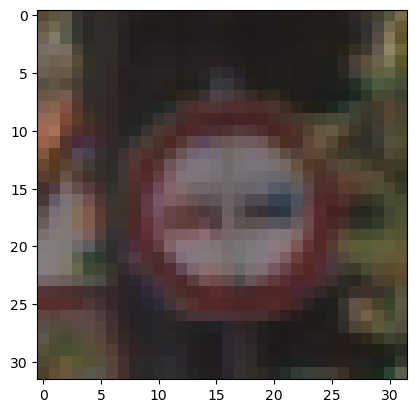

In [14]:
plt.imshow(X_train[11234])
y_train[11234]

## Preparing Data

##### Data Shuffling

In [15]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [16]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True) # gray scale, sum and divide by 3 to get all pixels and then sumiris 
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_valid/3, axis=3, keepdims=True) 

In [17]:
X_train_gray_norm = (X_train_gray - 128)/128 # normalize Min max scaling
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [18]:
X_train_gray.shape

(34799, 32, 32, 1)

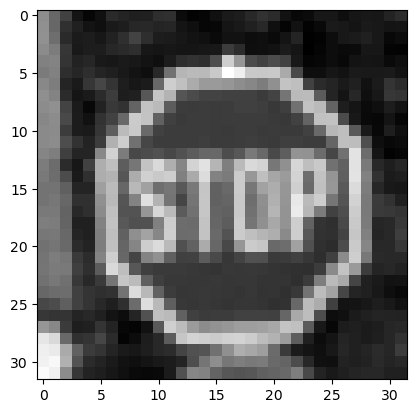

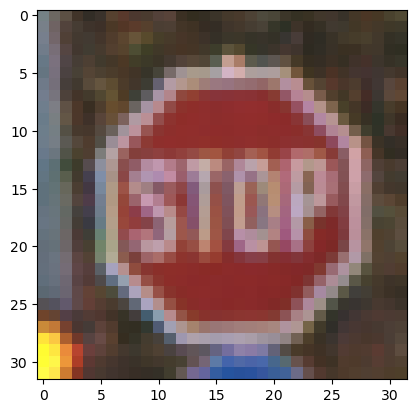

In [22]:
plt.imshow(X_train_gray[1000].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[1000])

## Model Training & Building 

In [23]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [24]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [25]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [26]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_valid))

Epoch 1/50
70/70 [==============================] - 7s 91ms/step - loss: 3.1514 - accuracy: 0.1858 - val_loss: 2.5899 - val_accuracy: 0.3415
Epoch 2/50
70/70 [==============================] - 6s 86ms/step - loss: 1.6021 - accuracy: 0.5530 - val_loss: 1.3704 - val_accuracy: 0.6086
Epoch 3/50
70/70 [==============================] - 6s 88ms/step - loss: 0.9043 - accuracy: 0.7389 - val_loss: 1.0047 - val_accuracy: 0.6927
Epoch 4/50
70/70 [==============================] - 6s 87ms/step - loss: 0.6422 - accuracy: 0.8231 - val_loss: 0.8519 - val_accuracy: 0.7549
Epoch 5/50
70/70 [==============================] - 6s 92ms/step - loss: 0.5072 - accuracy: 0.8628 - val_loss: 0.7955 - val_accuracy: 0.7685
Epoch 6/50
70/70 [==============================] - 6s 88ms/step - loss: 0.4246 - accuracy: 0.8855 - val_loss: 0.7100 - val_accuracy: 0.7859
Epoch 7/50
70/70 [==============================] - 7s 98ms/step - loss: 0.3594 - accuracy: 0.9043 - val_loss: 0.6752 - val_accuracy: 0.7973
Epoch 8/50
70

## Model Evaluation

In [27]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8555


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

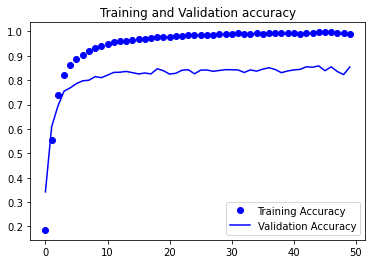

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


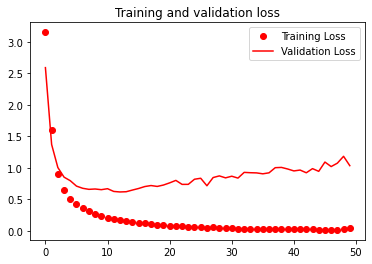

In [30]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

==========

# THANK YOU!